<a href="https://colab.research.google.com/github/ajmcquay/nm-covid/blob/master/nm_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Libraries

import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
# Data

df = pd.read_csv('covid.csv',parse_dates=['date'],index_col=['date'])
df.sort_values(by=['date'], inplace=True, ascending=True)
df.dropna(axis=0, how='all', inplace=True)
df.fillna('0 new cases',inplace=True)
df.head(10)

,BernalilloCountyS,EddyCountyS,McKinleyCountyS,McKinleyCountyM,EddyCountyM,BernalilloCountyM
date,,,,,,
2020-03-27,0 new cases,1 new case in Eddy County,0 new cases,2 new cases in McKinley County,0 new cases,27 new cases in Bernalillo County
2020-03-28,0 new cases,1 new case in Eddy County,0 new cases,0 new cases,0 new cases,11 new cases in Bernalillo County
2020-03-29,0 new cases,1 new case in Eddy County,0 new cases,4 new cases in McKinley County,0 new cases,9 new cases in Bernalillo County
2020-03-30,0 new cases,0 new cases,0 new cases,3 new cases in McKinley County,0 new cases,16 new cases in Bernalillo County
2020-03-31,0 new cases,0 new cases,0 new cases,4 new cases in McKinley County,0 new cases,12 new cases in Bernalillo County
2020-04-01,0 new cases,0 new cases,0 new cases,4 new cases in McKinley County,0 new cases,19 new cases in Bernalillo County
2020-04-02,0 new cases,0 new cases,0 new cases,4 new cases in McKinley County,0 new cases,15 new cases in Bernalillo County
2020-04-03,0 new cases,0 new cases,0 new cases,8 new cases in McKinley County,0 new cases,39 new cases in Bernalillo County
2020-04-04,0 new cases,0 new cases,1 new case in McKinley County,0 new cases,0 new cases,23 new cases in Bernalillo County


In [7]:
# TODO
# 1 - Scrape data for all other NM counties via crawler, roll into graph

# create array with all NM county names
counties = ['Bernalillo','McKinley','Eddy']

for county in counties:
    # set up variables for columns with multiple cases (M) and single cases (S)
    countyM = county + 'CountyM'
    countyS = county + 'CountyS'
    
    # convert to strings and trim off non-numerical characters
    df[countyM] = df[countyM].astype(str)
    df[countyS] = df[countyS].astype(str)
    df[countyM] = df[countyM].str.extract(r'(\d+)', expand=False).astype(int)
    df[countyS] = df[countyS].str.extract(r'(\d+)', expand=False).astype(int)
    
    # add M and S columns, store sum in new column
    county_sum = df[countyM] + df[countyS]
    df[county] = county_sum
    
    # drop unused columns
    df = df.drop(countyM, 1)
    df = df.drop(countyS, 1)
    
    # calculate rolling 7-day average
    df[county] = df[county].rolling(window=7).mean().round(decimals=0)

# fill NaN fields where a sum for 7 days is not available
df.fillna(0, inplace=True)

df.tail(10)

,Bernalillo,McKinley,Eddy
date,,,
2020-07-10,80.0,22.0,5.0
2020-07-11,80.0,19.0,5.0
2020-07-12,87.0,19.0,5.0
2020-07-13,87.0,21.0,6.0
2020-07-14,83.0,22.0,6.0
2020-07-15,92.0,21.0,6.0
2020-07-16,93.0,21.0,7.0
2020-07-17,99.0,18.0,6.0
2020-07-18,101.0,19.0,5.0


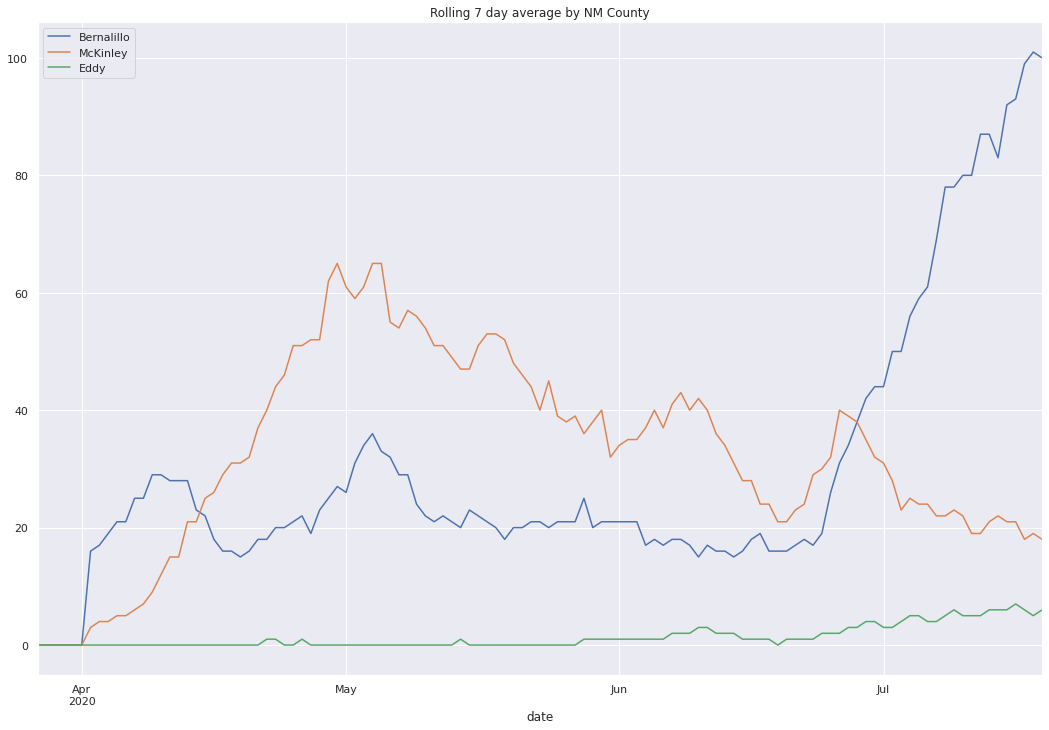

In [8]:
sns.set(style="darkgrid")
df.plot(title='Rolling 7 day average by NM County',figsize=(18,12))